# Lee-Six data analysis

In [1]:
using Revise
using DelimitedFiles
using Statistics
using Distributions
using Plots
gr()

Plots.GRBackend()

In [2]:
untypedM = readdlm("../data/Shearwater_calls_FDR0.95_all_muts.txt", '\t', Any; skipstart=1)
untypedM = untypedM[:, 5: end-1]
replace!(untypedM, "NA"=>0)
variants_var_col = Array{Int}(untypedM);

In [3]:
HSCMask_col = fill(false, size(variants_var_col, 2))
HSCMask_col[1:73] .= true
HSCMask_col[125:end] .= true
HPCMask_col = .!HSCMask_col;

In [4]:
mutBurden_col = sum(variants_var_col, dims=1);

In [5]:
include("../src/vafdyn.jl")
using .VAFDyn

In [6]:
vaf_var = sum(variants_var_col, dims=2) / 140
vafHSC_var = sum(variants_var_col[:, HSCMask_col], dims=2) / sum(HSCMask_col)
vafHPC_var = sum(variants_var_col[:, HPCMask_col], dims=2) / sum(HPCMask_col);

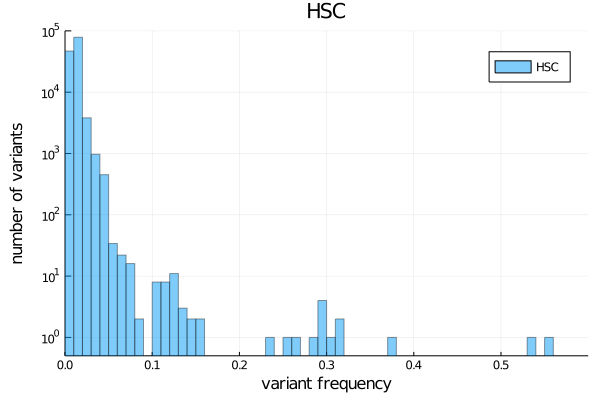

number of HSC cells:89


In [7]:
p1 = histogram(vafHSC_var, yaxis=:log10, bins=sum(HSCMask_col), 
        ylims=(10^-0.3, 10^5), xlims=(0, 0.6), label="HSC", fillalpha=0.5, linealpha=0.4)
xlabel!("variant frequency")
ylabel!("number of variants")
title!("HSC")
display(p1)
println("number of HSC cells:", sum(HSCMask_col))

In [14]:
mutHSCAv = mean(mutBurden_col[HSCMask_col])
mutHPCAv = mean(mutBurden_col[HPCMask_col])

mutHSCVar = var(mutBurden_col[HSCMask_col])
mutHPCVar = var(mutBurden_col[HPCMask_col])

mutDistHSC = fit(Poisson, mutBurden_col[HSCMask_col])
mutDistHPC = fit(Poisson, mutBurden_col[HPCMask_col])

display(mutDistHSC)
display(mutDistHPC)

Poisson{Float64}(λ=1036.7865168539327)

Poisson{Float64}(λ=1056.9607843137255)

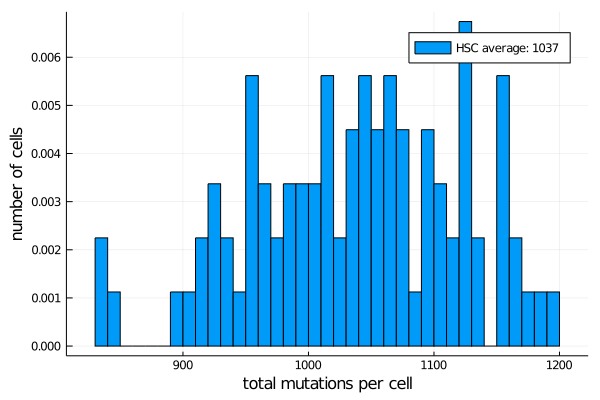

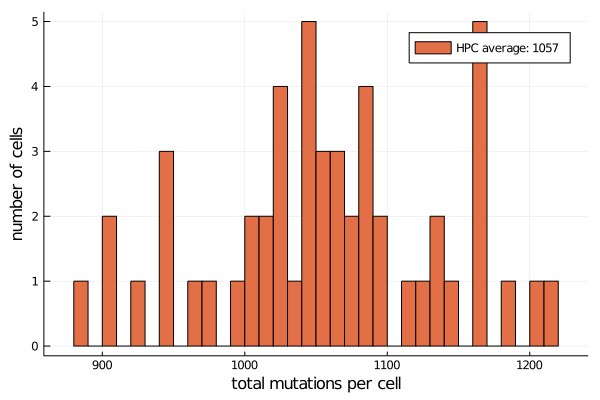

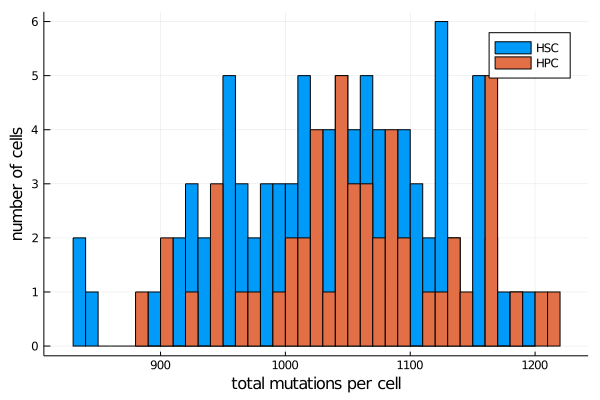

In [9]:
# ===== plot single cell(/colony) mutational burden =====

h1 = histogram(mutBurden_col[HSCMask_col], normalize=true, bins=40, 
    label="HSC average: "*string(Integer(round(mutHSCAv))))
xlabel!("total mutations per cell")
ylabel!("number of cells")
display(h1)

h2 = histogram(mutBurden_col[HPCMask_col], bins=40, 
    label="HPC average: "*string(Integer(round(mutHPCAv))), color=2)
xlabel!("total mutations per cell")
ylabel!("number of cells")
display(h2)

h3 = histogram(mutBurden_col[HSCMask_col], bins=40, label="HSC")
histogram!(mutBurden_col[HPCMask_col], bins=40, label="HPC")
xlabel!("total mutations per cell")
ylabel!("number of cells")
display(h3)

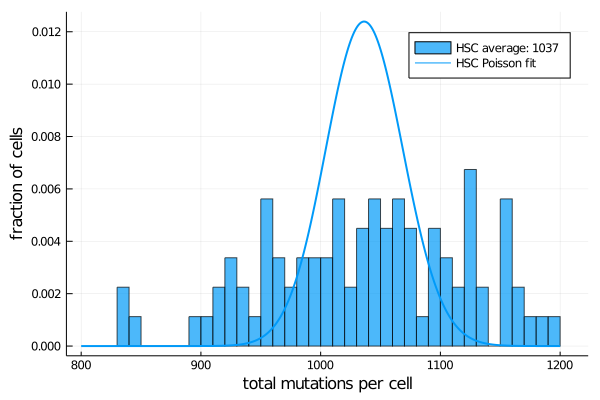

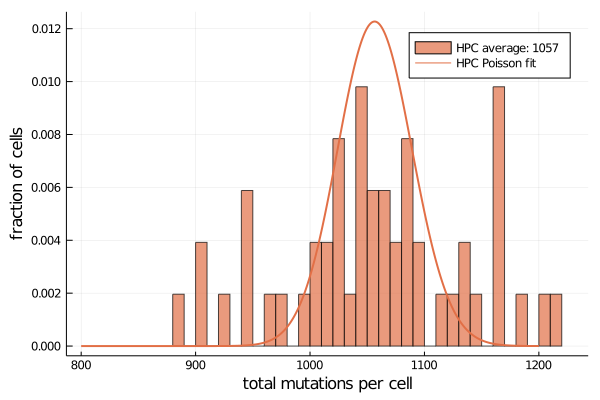

In [10]:
# ===== plot single cell(/colony) mutational burden =====

h1 = histogram(mutBurden_col[HSCMask_col], normalize=true, bins=40, 
    label="HSC average: "*string(Integer(round(mutHSCAv))), alpha=0.7)
plot!(800:1200, pdf.(mutDistHSC, 800:1200), label="HSC Poisson fit", color=1, linewidth=2)
xlabel!("total mutations per cell")
ylabel!("fraction of cells")
display(h1)

h2 = histogram(mutBurden_col[HPCMask_col], normalize=true, bins=40, 
    label="HPC average: "*string(Integer(round(mutHPCAv))), alpha=0.7, color=2)
plot!(800:1200, pdf.(mutDistHPC, 800:1200), label="HPC Poisson fit", color=2, linewidth=2)
xlabel!("total mutations per cell")
ylabel!("fraction of cells")
display(h2)

In [11]:
function randComPois(λ::Real, μ::Real, nSamples)
    Pλ = Poisson(λ)
    Pμ = Poisson(μ)
    n_s = rand(Pλ, nSamples)
    Y_s = sum.(rand.(Pμ, n_s))
end

randComPois (generic function with 1 method)

In [47]:
μ = 1.2/2
t = 59
λm = mutHSCAv/(t*μ)
# λv = mutHSCVar/(t*(μ+μ^2))

println(λm)

comPoisData = randComPois(λm*t, μ, 10000);
# comPois2Data = randComPois(λv*t, μ, 10000);

29.28775471338793


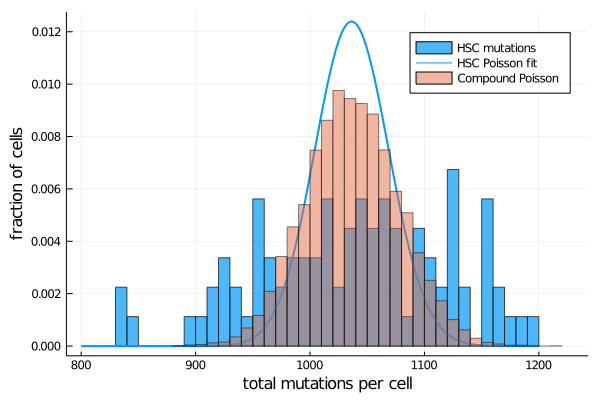

In [48]:
h1 = histogram(mutBurden_col[HSCMask_col], normalize=true, bins=40, 
    label="HSC mutations", alpha=0.7)
plot!(800:1200, pdf.(mutDistHSC, 800:1200), label="HSC Poisson fit", color=1, linewidth=2)
histogram!(comPoisData, normalize=true, bins=40, label="Compound Poisson", color=2, alpha=0.5)
xlabel!("total mutations per cell")
ylabel!("fraction of cells")
display(h1)

# savefig(h1, "LS_singleCellMutBurden.pdf")